# Get closer to your data

In [1]:
# imports
import os
import pandas as pd
import numpy as np

## Data manipulation with Python (pandas)

In [ ]:
import pandas as pd
# 1 First we will read the data in HousePrices.csv from our current workdir
housepricesdata = pd.read_csv("./HousePrices.csv")
# 2 Now we will check the first 5 rows of the data
housepricesdata.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You might not be able to see all the rows; Jupyter will truncate some of the variables. In order to view all of the rows and columns for any output in Jupyter, execute the following commands:
```py
#Setting options to display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
```

In [3]:
# 3 We can see the dimensions of the DataFrame with shape.
# shape is an attribute of the pandas DataFrame:
housepricesdata.shape

(1460, 81)

In [4]:
# 4 Let's take a look at the datatypes of the variables in the DataFrame:
housepricesdata.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# 5 The describe() function will show the statistics for the numerical variables only:
housepricesdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# 6 We will remove the id column, as this will not be necessary for our analysis:
# inplace=True will overwrite the DataFrame after dropping Id column
housepricesdata.drop(['Id'], axis=1, inplace=True)

In [7]:
# 7 Let's now look at the distribution of some of the object type variables,
# that is, the categorical variables. In the following example, we are going
# to look at LotShape and LandContour. We can study the other categorical
# variables of the dataset in the same way as shown in the following code block:

# # Name the count column as "count"
lotshape_frequencies = pd.crosstab(index=housepricesdata["LotShape"], columns="count") 

landcountour_frequencies = pd.crosstab(index=housepricesdata["LandContour"], columns="count") # Name the count column as "count"

print(lotshape_frequencies)
print("\n") # to keep a blank line for display
print(landcountour_frequencies)

col_0     count
LotShape       
IR1         484
IR2          41
IR3          10
Reg         925


col_0        count
LandContour       
Bnk             63
HLS             50
Low             36
Lvl           1311


In [9]:
# 8 We will now see how to perform a conversion between datatypes.
# What we notice is that the data definition of variables such as
# MSSubClass, OverallQual, and OverallCond are all categorical
# variables. After importing the dataset, however, they appear as integers.
# Using astype() to cast a pandas object to a specified datatype
housepricesdata['MSSubClass'] = housepricesdata['MSSubClass'].astype('object')
housepricesdata['OverallQual'] = housepricesdata['OverallQual'].astype('object')
housepricesdata['OverallCond'] = housepricesdata['OverallCond'].astype('object')

# Check the datatype of MSSubClass after type conversion
print(housepricesdata['MSSubClass'].dtype)
print('\n') # to keep a blank line for display

# Check the distribution of the levels in MSSubClass after conversion
# Make a crosstab with pd.crosstab()
# Name the count column as "count"
print(pd.crosstab(index=housepricesdata["MSSubClass"], columns="count"))

object


col_0       count
MSSubClass       
20            536
30             69
40              4
45             12
50            144
60            299
70             60
75             16
80             58
85             20
90             52
120            87
160            63
180            10
190            30


There are many variables that might not be very useful by themselves, but transforming them gives us a lot of interesting insights. Let's create some new, meaningful variables.

In [10]:
# 9 `YearBuilt` and `YearRemodAdd` represent the original construction date
# and the remodel date respectively. However, if they can be converted
# into age, these variables will tell us how old the buildings are and
# how many years it has been since they were remodeled. To do this, we
# create two new variables, BuildingAge and RemodelAge:

# Importing datetime package for date time operations
import datetime as dt

# using date time package for find the current year
current_year = int(dt.datetime.now().year)

# Substracting the `YearBuilt` form `current_year` to find out the age of the
# of the building
building_age = current_year - housepricesdata['YearBuilt']

# Substractung the `YearRemonAdd` from `current_year` to find out the
# age since building was remodelled
remodelled_age = current_year - housepricesdata['YearRemodAdd']

# 10 Now let's add the 2 variables into our dataset
# Adding the 2 variables into the dataset
housepricesdata['building_age'] = building_age
housepricesdata['remodelled_age'] = remodelled_age

# Checking our DataFrame to see if the two variables got added
housepricesdata.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,building_age,remodelled_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,22,22
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,49,49
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,24,23
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,110,55
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,25,25


Variables that contain label data need to be converted into a numerical form for machine learning algorithms to use. To get around this, we will perform encoding that will transform the labels into numerical forms so that the algorithms can use them.

In [11]:
# 11 We need to identify the variables that need encoding, which include
# Street, LotShape, and LandContour. We will perform one-hot encoding,
# which is a representation of categorical variables as binary vectors.
# We will use the pandas package in Python to do this:

# We use `get_dummies()` function to one-hot encode `LotShape`
one_hot_encoded_variables = pd.get_dummies(housepricesdata['LotShape'],prefix='LotShape')

# Print the one-hot encoded variables to see how they look like
print(one_hot_encoded_variables)

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg
0            False         False         False          True
1            False         False         False          True
2             True         False         False         False
3             True         False         False         False
4             True         False         False         False
...            ...           ...           ...           ...
1455         False         False         False          True
1456         False         False         False          True
1457         False         False         False          True
1458         False         False         False          True
1459         False         False         False          True

[1460 rows x 4 columns]


In [12]:
# 12 Add the one-hot encoded variables to our DataFrame, as follows:
# Adding the new created one-hot encoded variables to our DataFrame
housepricesdata = pd.concat([housepricesdata, one_hot_encoded_variables], axis=1)

# Let's take a look at the added one-hot encoded variables
# Scroll right to view the added variables
housepricesdata.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,building_age,remodelled_age,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,22,22,False,False,False,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,49,49,False,False,False,True
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,24,23,True,False,False,False
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,110,55,True,False,False,False
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,25,25,True,False,False,False


In [13]:
# 13 Now, let's remove the original variables since we have already created our one-hot encoded variables:
# Dropping the original variable after one-hot encoding the original variable
# inplace = True option will overwrite the DataFrame

housepricesdata.drop(['LotShape'], axis=1, inplace=True)

## Analyzing, visualizing, and treating missing values

In [14]:
# 1 With the following syntax, we can see which variables have missing values:
# Check which variables have missing values

columns_with_missing_values = housepricesdata.columns[housepricesdata.isnull().any()]
housepricesdata[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

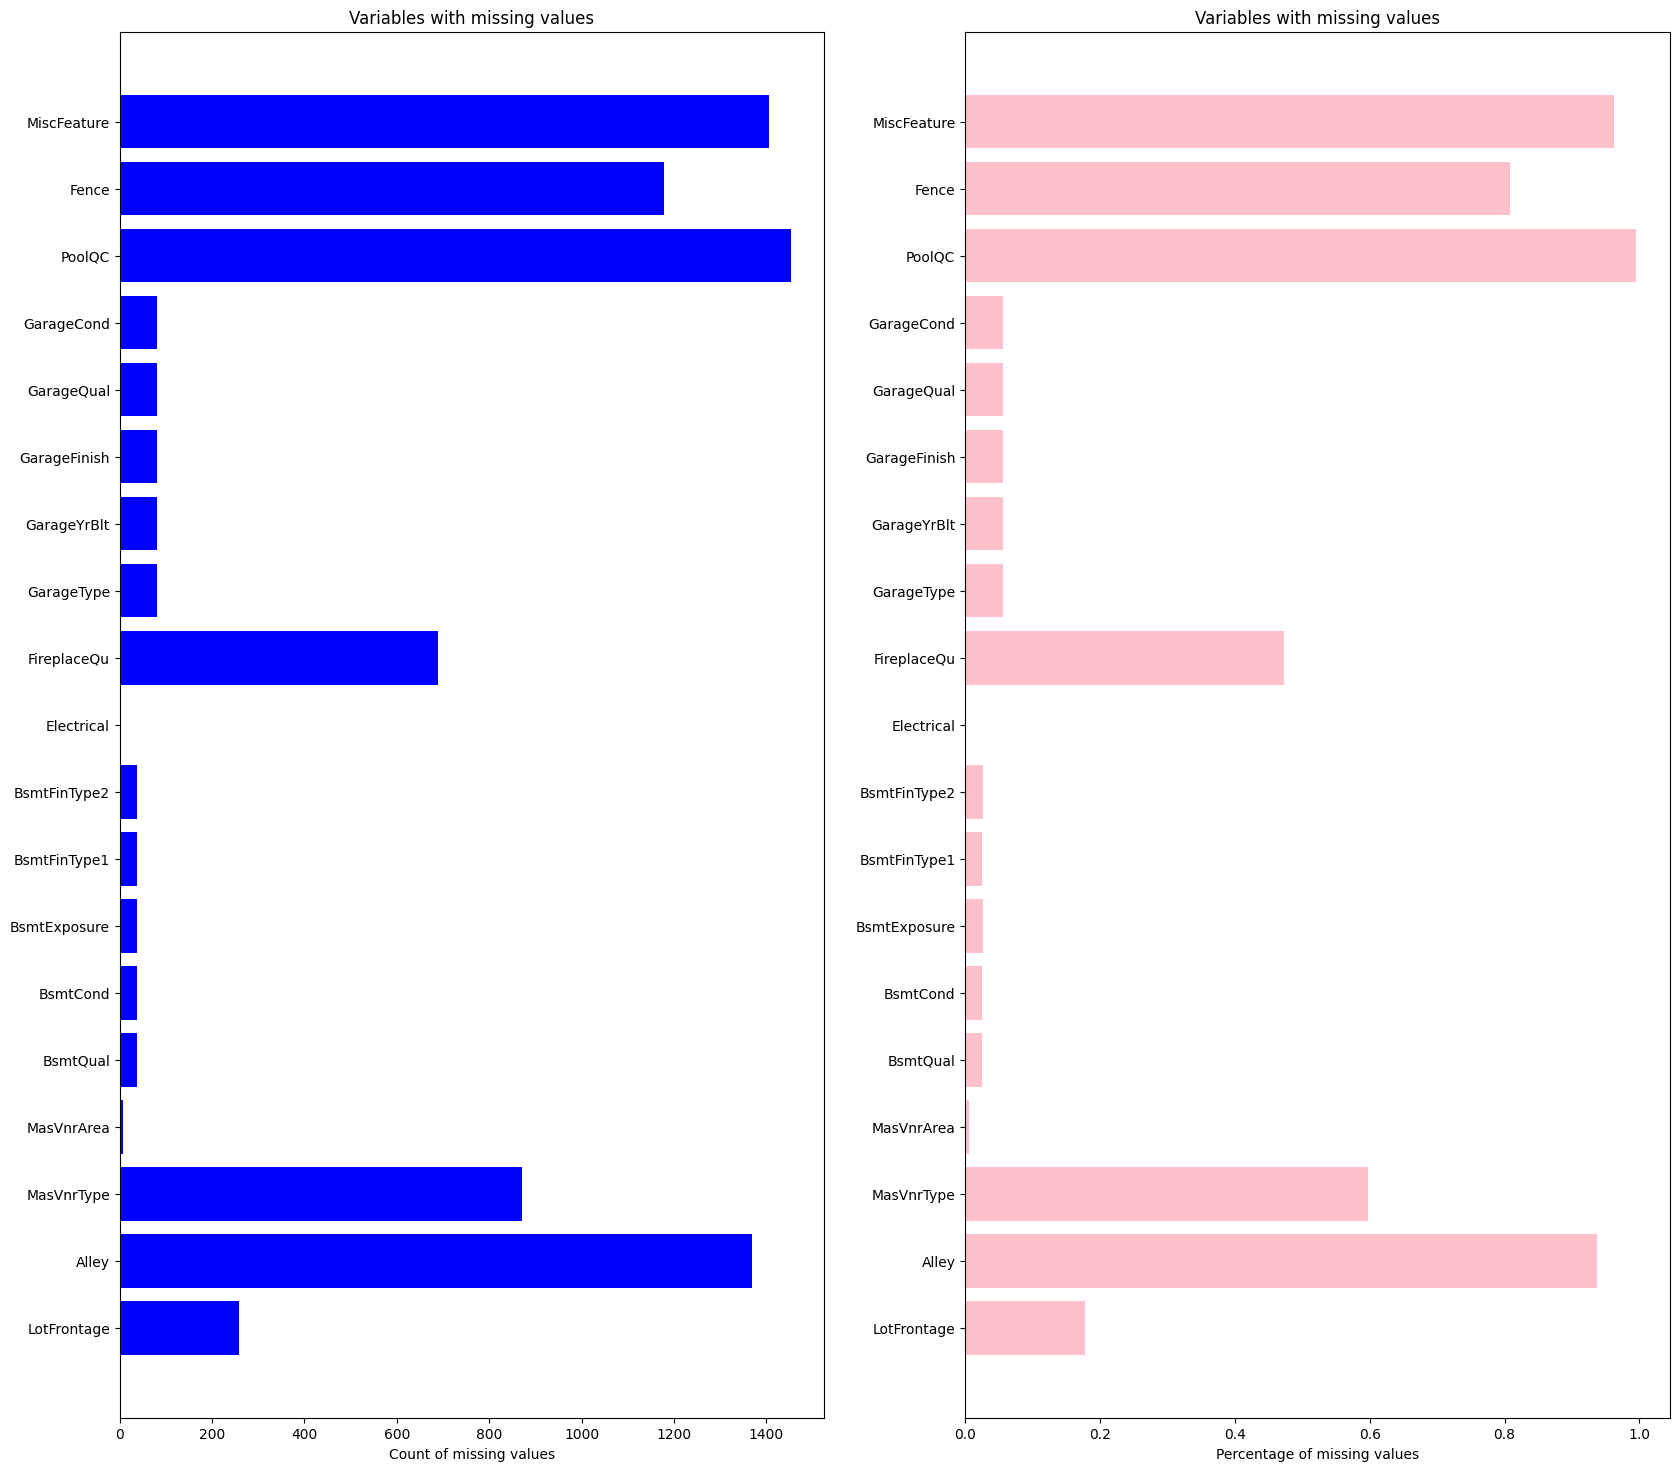

In [15]:
# 2 You might also like to see the missing values in terms of percentages. To see the count and percentage of missing values, execute the following command:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(housepricesdata[col].isnull().sum())
    # housepricesdata.shape[0] will give the total row count
    percentcount.append(housepricesdata[col].isnull().sum()/housepricesdata.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values")

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values")

We notice that variables such as Alley, `PoolQC`, `Fence`, and `MiscFeature` have 80% to 90% of their values missing. `FireplaceQu` has 47.26% of its values missing. A few other variables, such as `LotFrontage`, `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, and a few more Garage-related variables have missing values as well.

But there is a catch. Let's look at the `Alley` variable again. It shows us that it has 93.76% missing values. Now take another look at the data description that we looked at in the preceding section. The variable description for Alley shows that it has three levels: gravel, paved, and no access. In the original dataset, 'No Access' is codified as NA. When NA is read in Python, it is treated as `NaN`, which means that a value is missing, so we need to be careful.

<Axes: >

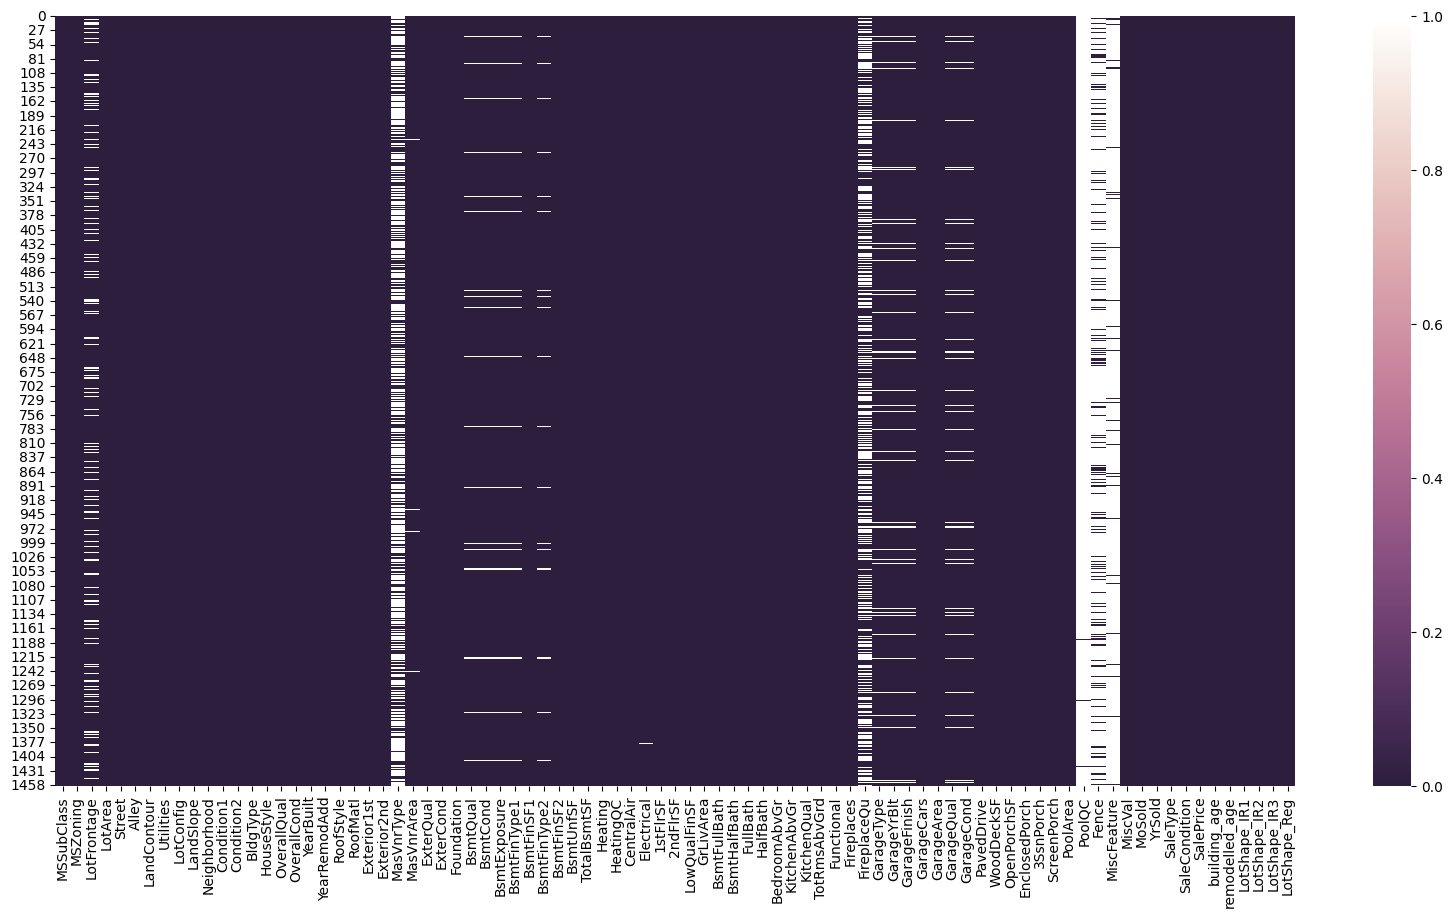

In [17]:
# 3 Now we will replace the missing values for Alley with a valid value, such as
# 'No Access'

# Replacing mussing values with 'No Access' in Allet variable
housepricesdata['Alley'].fillna('No Access', inplace=True)

# 4 Now, let's visualize the missing values and try to see how can we treat them
# The following code generates a chart that showcases the spread of missing values.
# Here we use the seaborn library to plot the charts:

# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

# We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

# The color of the map is generated with linearly increasing brightness by the
# cubehelix_palette() function:

From the preceding plot, it is easier to read the spread of the missing values. **The white marks on the chart indicate missing values**. Notice that Alley no longer reports any missing values.

/tmp/ipykernel_101222/5702477.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)


<Axes: >

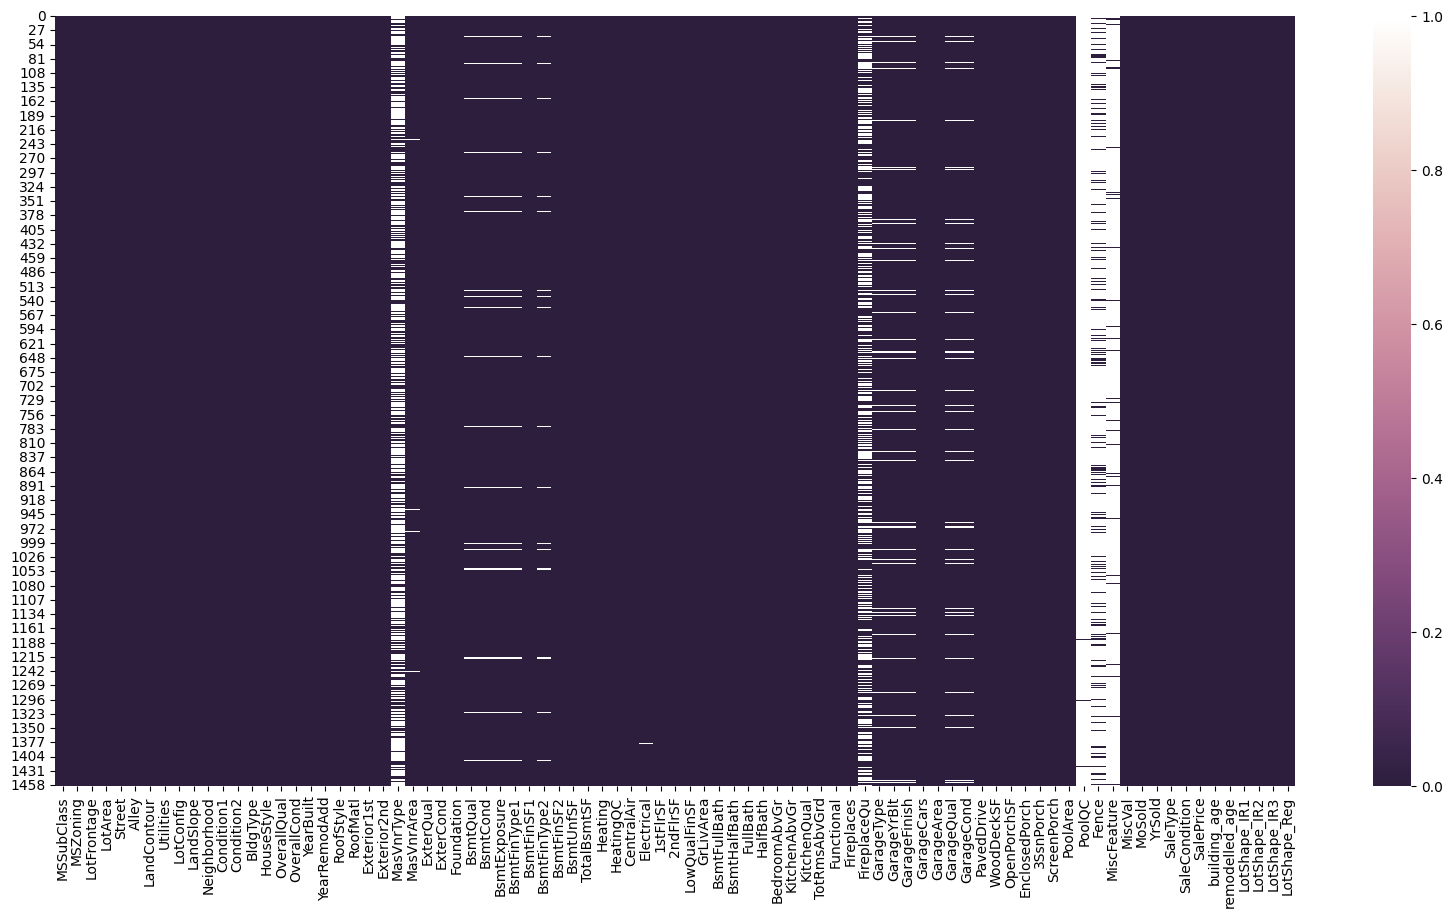

In [18]:
# 5 LotFrontage is a continuous variable and has 17.74% of its values missing. Replace the missing values
# in this variable with its median as follows:

# Filling in the missing values in LotFrontage with its median value
housepricesdata['LotFrontage'].fillna(housepricesdata['LotFrontage'].median(), inplace=True)

# 6 Let's view the missing value plot once again to see if the missing values from LotFrontage have been imputed.
# Copy and execute the preceding code.
# The missing value plot will look as follows:
%matplotlib inline
plt.figure(figsize=(20, 10))
# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

Here, we can see in the preceding plot that there are no more missing values for `Alley` or `LotFrontage`.

In [22]:
# 7 We have figured out from the data description that several variables have values
# that are codified as NA. Because this is read in Python as missing values,
# we replace all of these with their actual values, which we get to see in
# the data description shown in the following code block:

# Replacing all NA values with their original meaning
housepricesdata.fillna({'BsmtQual': 'No Basement'}, inplace=True)
housepricesdata.fillna({'BsmtCond': 'No Basement'}, inplace=True)
housepricesdata.fillna({'BsmtExposure': 'No Basement'}, inplace=True)
housepricesdata.fillna({'BsmtFinType1' :' No Basement'}, inplace=True)
housepricesdata.fillna({'BsmtFinType2': 'No Basement'}, inplace=True)

housepricesdata.fillna({'GarageYrBlt': 0}, inplace=True)

# # For observations where GarageType is null, we replace null values in GarageYrBlt=0
housepricesdata.fillna({'GarageType': 'No Garage'}, inplace=True)
housepricesdata.fillna({'GarageFinish': 'No Garage'}, inplace=True)
housepricesdata.fillna({'GarageQual': 'No Garage'}, inplace=True)
housepricesdata.fillna({'GarageCond': 'No Garage'}, inplace=True)


housepricesdata.fillna({'PoolQC': 'No Pool'}, inplace=True)
housepricesdata.fillna({'Fence': 'No Fence'}, inplace=True)
housepricesdata.fillna({'MiscFeature': 'None'}, inplace=True)

housepricesdata.fillna({'FireplaceQu': 'No Fireplace'}, inplace=True)

<Axes: >

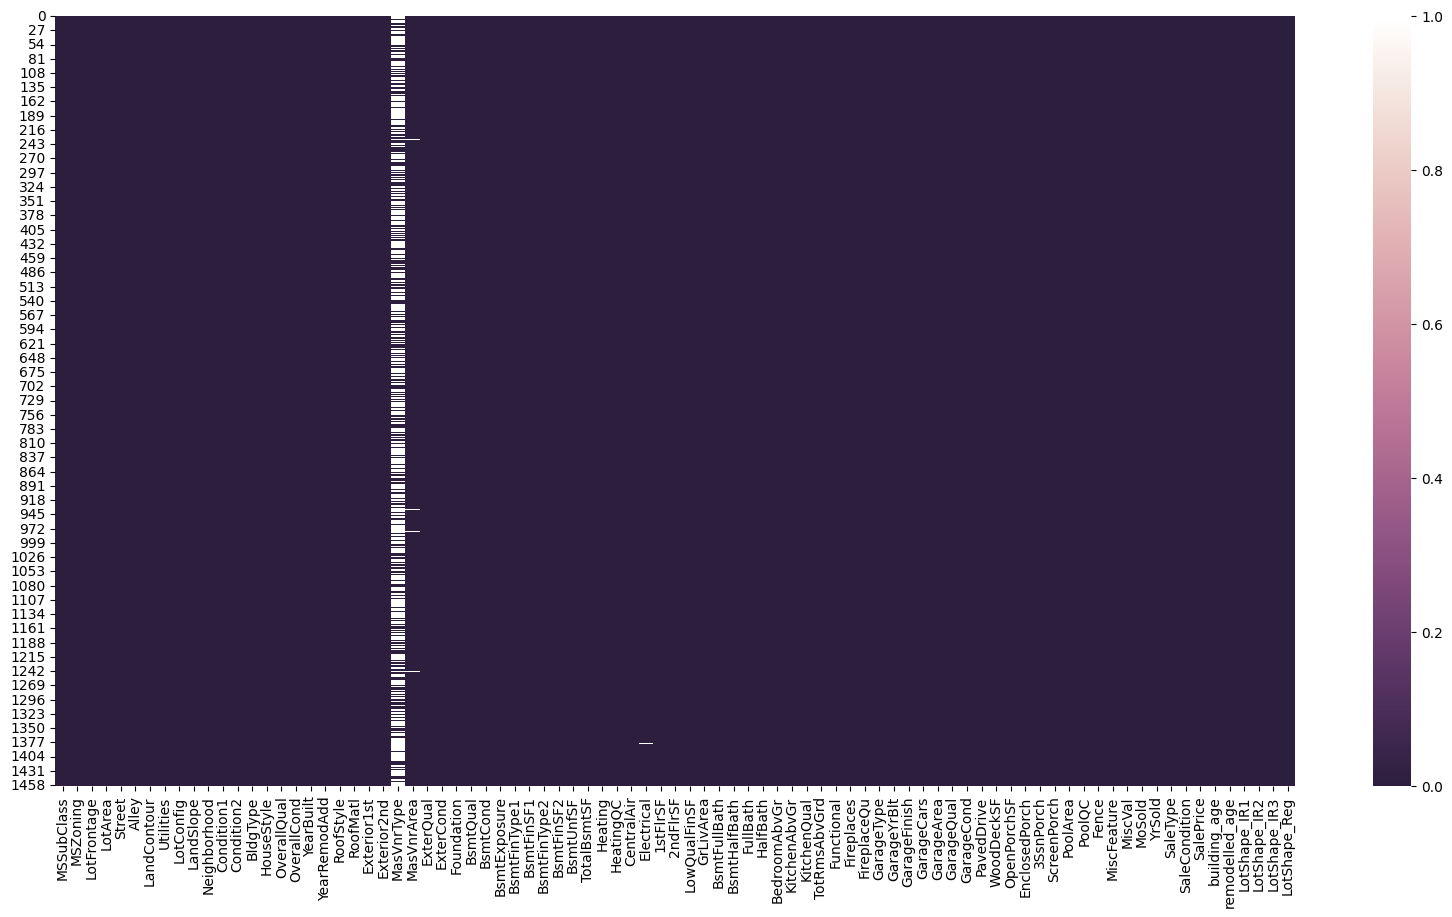

In [23]:
# 8 Let's take a look at the missing value plot after having treated the preceding variables:
%matplotlib inline
plt.figure(figsize=(20, 10))
# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

We notice from the preceding plot that there are no more missing values for the variables that we have just treated. However, we are left with a few missing values in `MasVnrType`, `MasVnrArea`, and `Electrical`.

In [24]:
# 9 Let's try to look at the distribution of `MasVnrType` by `MasVnrArea` with a crosstab:

# Using crosstab to generate the count of MasVnrType by type of MasVnrArea
print(pd.crosstab(index=housepricesdata["MasVnrType"],\
    columns=housepricesdata["MasVnrArea"], dropna=False, margins=True)) 

MasVnrArea  0.0  1.0  11.0  14.0  16.0  18.0  22.0  24.0  27.0  28.0  ...  \
MasVnrType                                                            ...   
BrkCmn        0    0     0     0     0     0     0     0     0     0  ...   
BrkFace       1    0     1     1     6     2     1     0     1     1  ...   
Stone         1    0     0     0     1     0     0     1     0     0  ...   
NaN         859    2     0     0     0     0     0     0     0     0  ...   
All         861    2     1     1     7     2     1     1     1     1  ...   

MasVnrArea  975.0  1031.0  1047.0  1115.0  1129.0  1170.0  1378.0  1600.0  \
MasVnrType                                                                  
BrkCmn          0       0       0       0       0       0       0       0   
BrkFace         1       1       1       1       1       1       1       1   
Stone           0       0       0       0       0       0       0       0   
NaN             0       0       0       0       0       0       0       0  

In [26]:
# 10 We will then impute the missing values in MasVnrType with None and `MasVnrArea` with zero.
# This is done with the commands shown in the following code block:

# Filling in the missing values for MasVnrType and MasVnrArea with None and 0 respectively
housepricesdata.fillna({'MasVnrType': 'None'}, inplace=True)
housepricesdata.fillna({'MasVnrArea': 0}, inplace=True)

# We are still left with one missing value in the Electrical variable.

In [27]:
# 11 Let's take a look at the observation where Electrical has a missing value:
housepricesdata['MSSubClass'][housepricesdata['Electrical'].isnull()]

1379    80
Name: MSSubClass, dtype: object

In [28]:
# 12 We see that MSSubClass is 80 when Electrical is null. Let's see the distribution of
# the Electrical type by MSSubClass:

# Using crosstab to generate the count of Electrical Type by MSSubClass
print(pd.crosstab(index=housepricesdata["Electrical"],\
    columns=housepricesdata['MSSubClass'], dropna=False, margins=True))

# From the following output, we can see that when MSSubClass is 80, the majority of cases
# of the Electrical type are SBrkr:

MSSubClass   20  30  40  45   50   60  70  75  80  85  90  120  160  180  190  \
Electrical                                                                      
FuseA        31  18   2   3   20    0   8   2   0   0   5    0    0    0    5   
FuseF         5   4   0   2    8    0   2   0   1   0   4    0    0    0    1   
FuseP         0   1   0   0    0    0   0   0   0   0   1    0    0    0    1   
Mix           0   1   0   0    0    0   0   0   0   0   0    0    0    0    0   
SBrkr       500  45   2   7  116  299  50  14  56  20  42   87   63   10   23   
NaN           0   0   0   0    0    0   0   0   1   0   0    0    0    0    0   
All         536  69   4  12  144  299  60  16  58  20  52   87   63   10   30   

MSSubClass     All  
Electrical          
FuseA         94.0  
FuseF         27.0  
FuseP          3.0  
Mix            1.0  
SBrkr       1334.0  
NaN            NaN  
All         1460.0  


<Axes: >

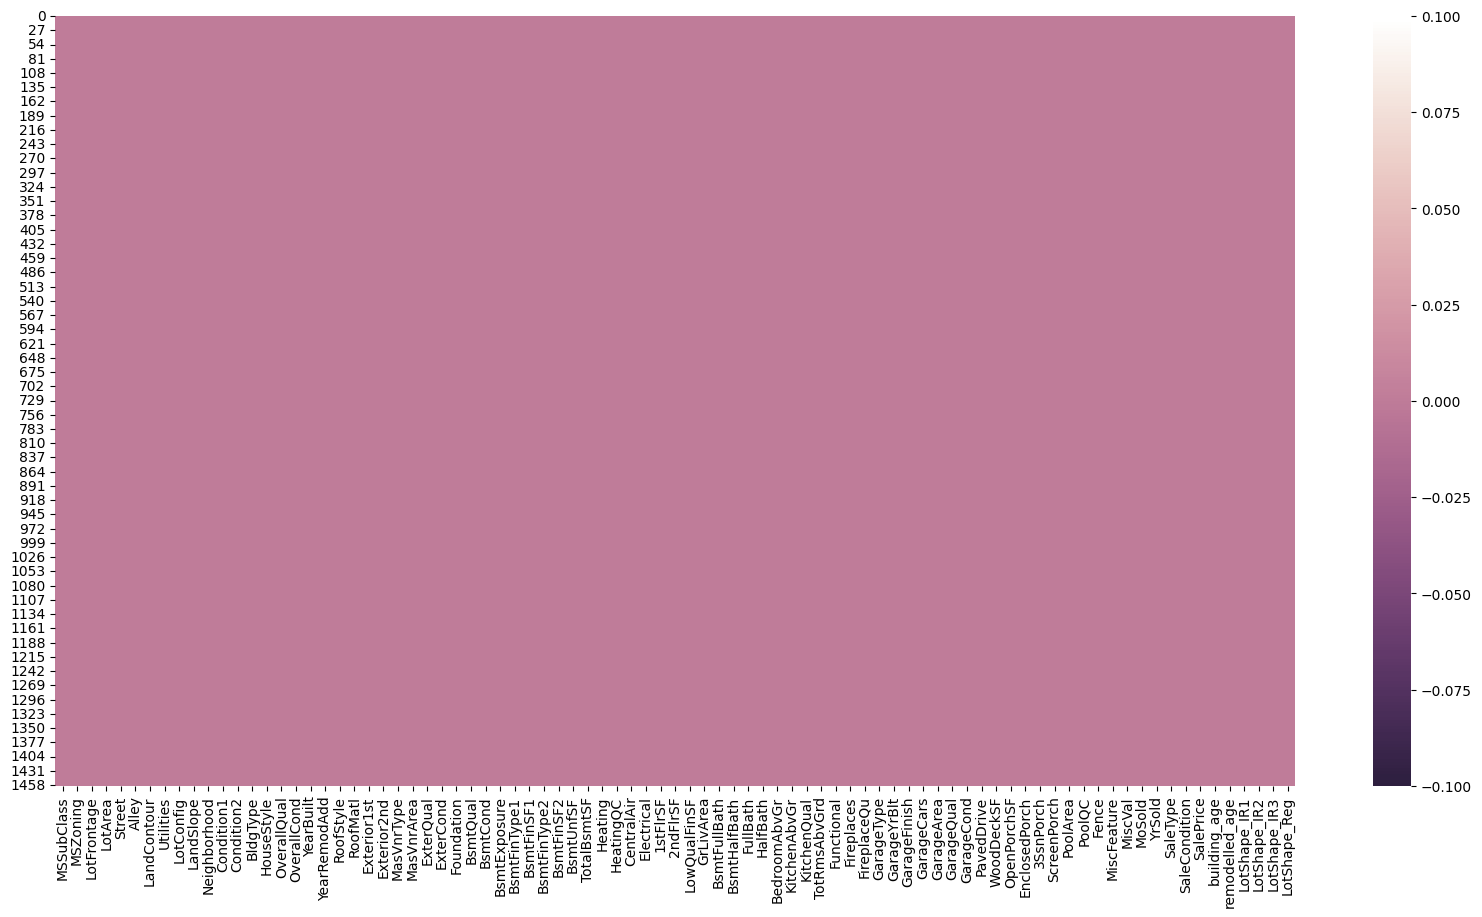

In [29]:
# 13 Go ahead and impute the missing value in the Electrical variable with SBrKr by executing the following code:
housepricesdata.fillna({'Electrical': 'SBrkr'}, inplace=True)

# 14 After this, let's take a look at our missing value plot for a final time:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(housepricesdata.isnull(), cmap=cmap)

Notice that the plot has changed and now shows no missing values in our DataFrame.

## Exploratory data analysis

In [30]:
# 1 In the first section on data manipulation, we saw summary statistics for our datasets.
# However, we have not looked at this since imputing the missing values.

# Let's now look at the data and its basic statistics using the following code:

# To take a look at the top 5 rows in the dataset
housepricesdata.head(5)

# To display the summary statistics for all variables
housepricesdata.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,building_age,remodelled_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,53.732192,40.134247
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.202904,20.645407
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,15.000000,15.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,25.000000,21.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,52.000000,31.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,71.000000,58.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,153.000000,75.000000


In [31]:
# 2 With the preceding code, we can see the summary statistics of the
# variables in the earlier section.

# Now let's see how many columns there are by datatype:

# How many columns with different datatypes are there?
housepricesdata.dtypes.value_counts()

object     45
int64      33
bool        4
float64     3
Name: count, dtype: int64

In [32]:
# 3 Let's create 2 variables to hold the names of the numerical categorical variables

# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = housepricesdata.dtypes[housepricesdata.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

# Pulling out names of categorical variables by conditioning dtypes equal
categorical_features = housepricesdata.dtypes[housepricesdata.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  40
Number of Categorical features:  45


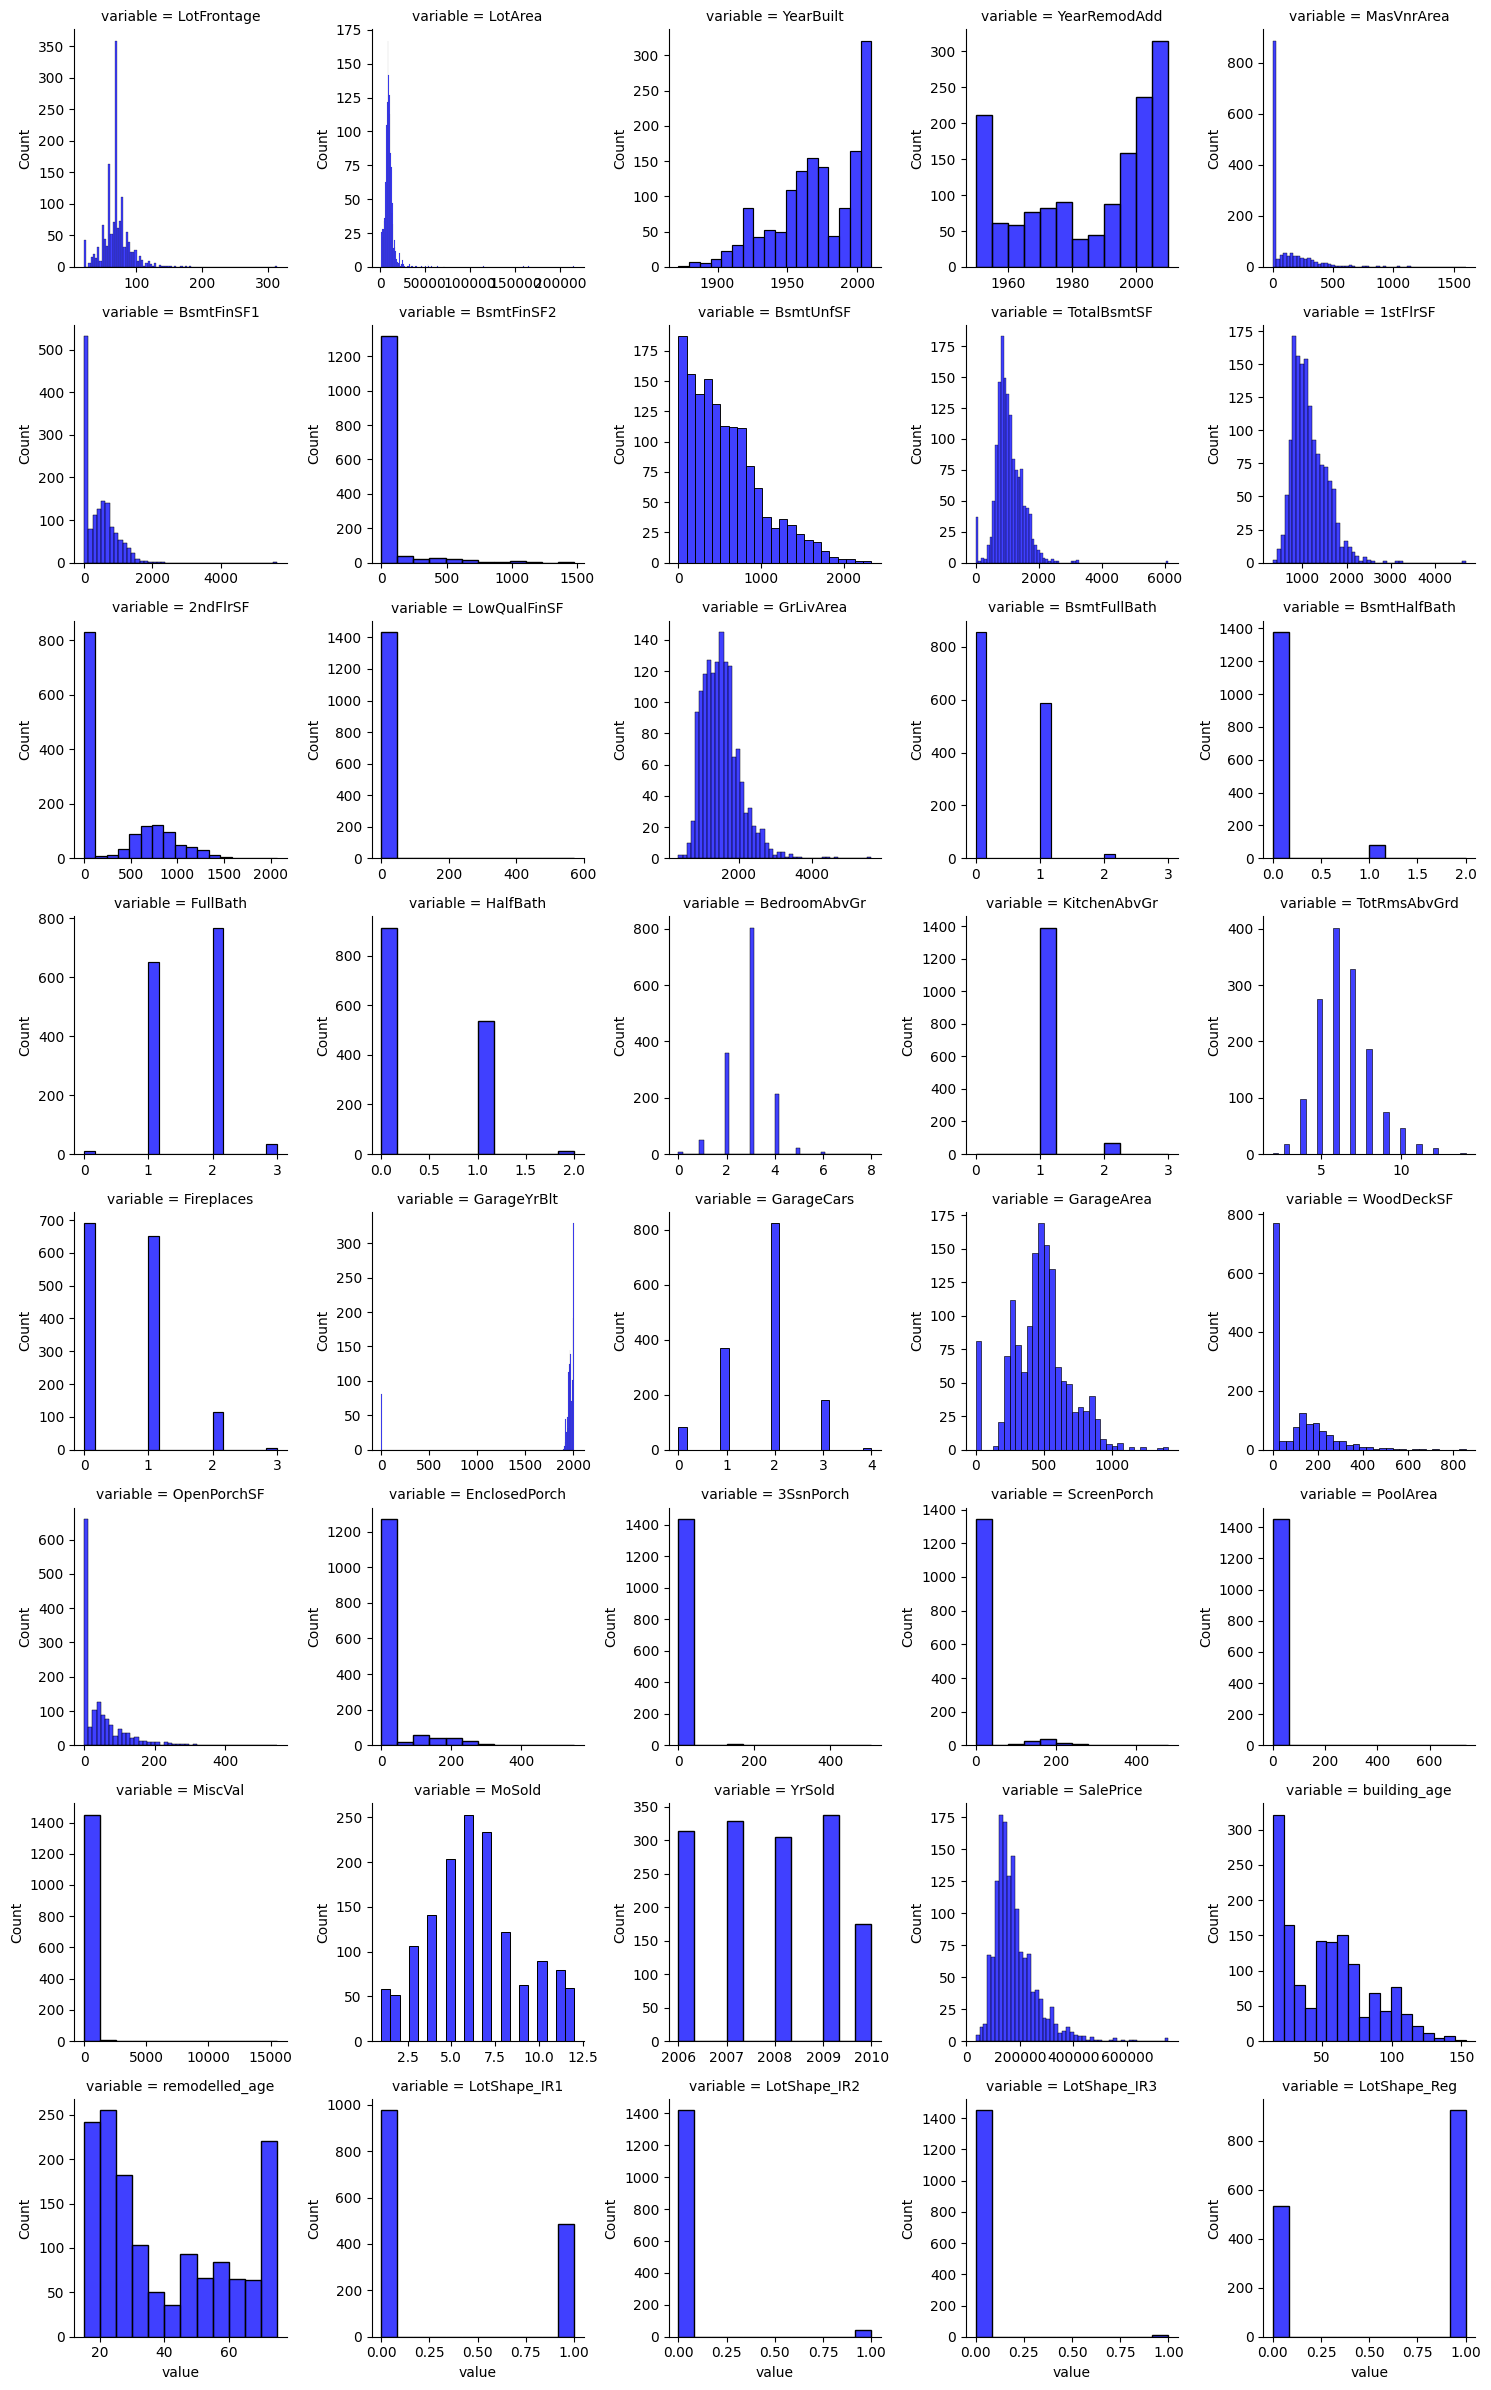

In [33]:
# 4 We will now use the numerical_features variable that we previously
# created to see the distributions of numerical variables. We will use
# the seaborn library to plot our charts:

# We use the `melt()` method from pandas to reshape our DataFrame. You may want to view the
# reshaped data after using the `melt()` method to understand how the DataFrame is arranged.

melt_num_features = pd.melt(housepricesdata, value_vars=numerical_features)
grid = sns.FacetGrid(melt_num_features, col="variable", col_wrap=5, sharex=False, sharey=False)
grid = grid.map(sns.histplot, "value", color="blue") 

/home/ibrahim/.cache/pypoetry/virtualenvs/ensemble-machine-learning-h8-507GX-py3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ibrahim/.cache/pypoetry/virtualenvs/ensemble-machine-learning-h8-507GX-py3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ibrahim/.cache/pypoetry/virtualenvs/ensemble-machine-learning-h8-507GX-py3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ibrahim/.cache

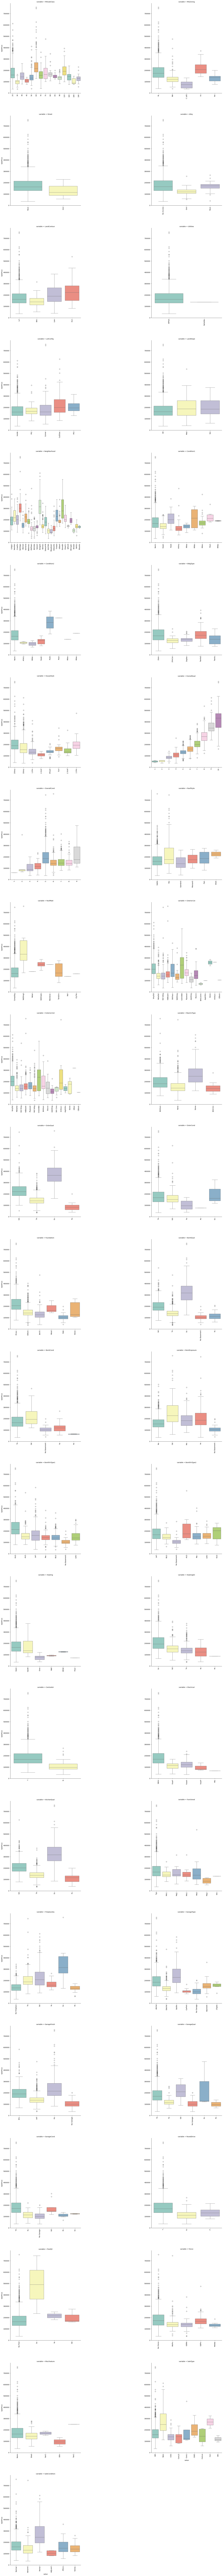

In [46]:
# 5 Now, we use the categorical_features variable to plot the distribution of
# house prices by each categorical variable:
melt_cat_features = pd.melt(housepricesdata, id_vars=['SalePrice'], value_vars=categorical_features)

grid = sns.FacetGrid(melt_cat_features, col="variable", col_wrap=2, sharex=False, sharey=False, height=10)
grid.map(sns.boxplot, "value", "SalePrice", palette="Set3")
grid.figure.subplots_adjust(wspace=1, hspace=0.25)

for ax in grid.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=90)